In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.io
import geopandas as gpd
import math
import glob
from geopandas.tools import sjoin
from matplotlib.offsetbox import AnchoredText
import matplotlib.lines as mlines
from scipy.interpolate import interpn
import matplotlib.transforms as mtransforms
import netCDF4
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [65]:
##Get file list of BaRAD data
myFiles=list()
myFiles=glob.glob('..\BaRAD_Dataset\*.nc')

In [66]:
#Find grids nearest to a point (say 20 , 40)
lat_point=20
lon_point=40
BaRAD_test=netCDF4.Dataset('..\BaRAD_Dataset\BaRAD1980.nc')
Val_lat=find_nearest(BaRAD_test.variables['lat'][:],lat_point)
result_lat = np.where(BaRAD_test.variables['lat'][:] == Val_lat)

Val_lon=find_nearest(BaRAD_test.variables['lon'][:],lon_point)
result_lon = np.where(BaRAD_test.variables['lon'][:] == Val_lon)


In [67]:
#Load in data corresponding to location 
K_down=[]
K_diff=[]
K_dir=[]
for item in myFiles:
    Temp=netCDF4.Dataset(item)
    K_down.append(np.squeeze(Temp.variables['K_down'][:][:,result_lat, result_lon]))
    K_diff.append(np.squeeze(Temp.variables['K_diff'][:][:,result_lat, result_lon]))
    K_dir.append(np.squeeze(Temp.variables['K_dir'][:][:,result_lat, result_lon]))
K_down=np.array(K_down).flatten()
K_dir=np.array(K_dir).flatten()
K_diff=np.array(K_diff).flatten()

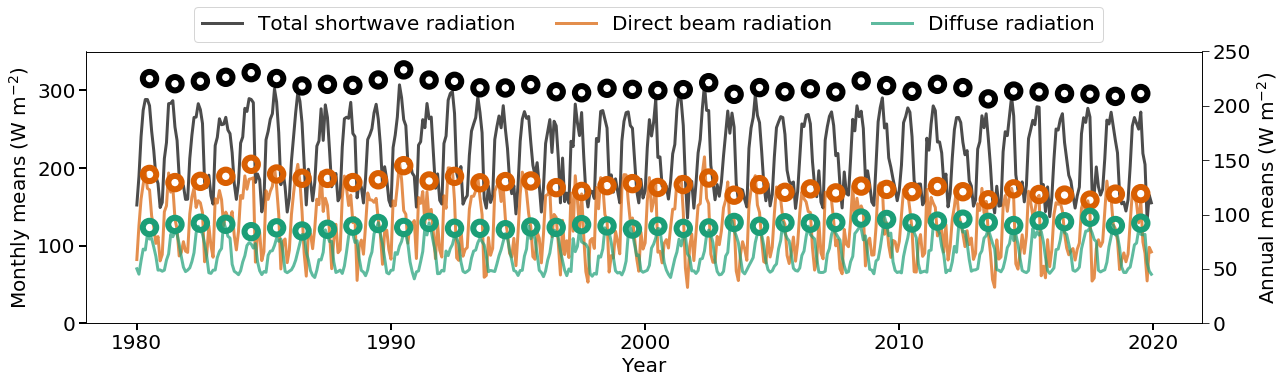

In [69]:
##Plot data

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(K_down,color='k',linewidth=3,alpha=0.7,label='Total shortwave radiation')
ax.plot(K_dir,color='#d95f02',linewidth=3,alpha=0.7,label='Direct beam radiation')
ax.plot(K_diff,color='#1b9e77',linewidth=3,alpha=0.7,label='Diffuse radiation')

ax.set_xlabel('Year', size=20)
ax.set_ylabel('Monthly means (W m$^{-2}$)', size=20)

ax2 = ax.twinx()


ax2.scatter(np.array(range(6,480,12)),np.mean(K_down.reshape(-1, 12), axis=1),facecolors='none',edgecolor='k',s=180,linewidth=6,label='Total shortwave radiation')
ax2.scatter(np.array(range(6,480,12)),np.mean(K_dir.reshape(-1, 12), axis=1),facecolors='none',edgecolor='#d95f02',s=180,linewidth=6,label='Direct beam radiation')
ax2.scatter(np.array(range(6,480,12)),np.mean(K_diff.reshape(-1, 12), axis=1),facecolors='none',edgecolor='#1b9e77',s=180,linewidth=6,label='Diffuse radiation')

ax2.tick_params(axis="both",labelsize=20)
ax2.set_xlabel('Year', size=20)
ax2.set_ylabel('Annual means (W m$^{-2}$)', size=20)



ticks = [0, 120, 240,360,480]
labels = ["1980", "1990", "2000","2010","2020"]
plt.xticks(ticks, labels)
#ax.legend(ncol = 6,fontsize=16)
ax.tick_params(length=7, width=2, right=True)
ax.legend(ncol = 3,fontsize=20,bbox_to_anchor=(0.55, 0., 0.37, 1.2))
ax.set_ylim(0,350)
ax2.set_ylim(0,250)
ax.tick_params(axis='both', labelsize=20)
ax.tick_params(axis='y', right=False, length=7,labelsize=20)
ax2.tick_params(axis='y', left=False, length=7,labelsize=20)
#Save
plt.savefig('Example_site.png',dpi=400,bbox_inches='tight')